# United States presidential elections (Nov. 2024)

## Get the data

### Get the hexagonal tiling

Use [`geopandas.read_file`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) to retrieve the hexagonal tiling of the United States. Compute and store the centroid of each hexagon, which will serve as the anchor point for the state abbreviation. 

In [156]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
from mpl_ornaments.titles import set_title_and_subtitle

#Read the hexagons
df_hexgrid = gpd.read_file('https://raw.githubusercontent.com/bianconif/graphic_communication_notebooks/refs/heads/master/data/geo/us-hexgrid-stanke/HexStatesPadded/HexStatesPadded.shp')

#Compute and store the centroids
df_hexgrid['centroids'] = df_hexgrid['geometry'].centroid

print(df_hexgrid.head())

        State State_Abbr                                           geometry  \
0     Alabama         AL  POLYGON ((14.06 0.133, 14.06 1.156, 14.99 1.71...   
1      Alaska         AK  POLYGON ((0.06 10.333, 0.06 11.356, 0.99 11.91...   
2     Arizona         AZ  POLYGON ((5.06 1.833, 5.06 2.856, 5.99 3.414, ...   
3    Arkansas         AR  POLYGON ((11.06 1.833, 11.06 2.856, 11.99 3.41...   
4  California         CA  POLYGON ((3.06 1.833, 3.06 2.856, 3.99 3.414, ...   

              centroids  
0  POINT (14.99 0.6445)  
1  POINT (0.99 10.8445)  
2   POINT (5.99 2.3445)  
3  POINT (11.99 2.3445)  
4   POINT (3.99 2.3445)  


C:\Users\bianc\AppData\Local\Temp\ipykernel_20220\1599043214.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_hexgrid['centroids'] = df_hexgrid['geometry'].centroid


Observe that the hexagons and centroids are respectively stored as _polygons_ (`POLYGON`) and _points_ (`POINT`) GIS primitives (see also our previous [article on choroplet maps](https://medium.com/@bianco_29735/graphic-communication-with-python-5-choroplet-map-56b3228e0a60) for further details on this).   

### Get the election results

Get the election results by state. Keep only the `STATE`, `HARRIS`, `TRUMP`, `ELECTORAL VOTES` and `TOTAL VOTES` columns. Add three columns respectively showing the winner for each state (`WINNER`), the number of votes received by the winner (`VOTES_WINNER`) and the percentage of votes received by the winner (`PERC_WINNER`). Eventually merge the geographical data (hexgrid) with the election results.

In [157]:
#Get the election results
df_votes = pd.read_csv('https://raw.githubusercontent.com/bianconif/graphic_communication_notebooks/refs/heads/master/data/usgov/2024presgeresults.csv', index_col=None, comment='#')
df_votes = df_votes[['STATE', 'HARRIS', 'TRUMP', 'ELECTORAL VOTES', 'TOTAL VOTES']]

#Store winner, number of votes of the winner and percentage of votes of the winner 
df_votes['WINNER'] = np.where(df_votes['HARRIS'] > df_votes['TRUMP'], 'HARRIS', 'TRUMP')
df_votes['VOTES_WINNER'] = np.where(df_votes['WINNER'] == 'HARRIS', df_votes['HARRIS'], df_votes['TRUMP'])
df_votes['PERC_WINNER'] = 100*df_votes['VOTES_WINNER']/df_votes['TOTAL VOTES']

#merge the geographical data (hexgrid) with the election results
df_merged = pd.merge(left=df_hexgrid, right=df_votes, left_on='State_Abbr', right_on='STATE')

print(df_merged.head())

        State State_Abbr                                           geometry  \
0     Alabama         AL  POLYGON ((14.06 0.133, 14.06 1.156, 14.99 1.71...   
1      Alaska         AK  POLYGON ((0.06 10.333, 0.06 11.356, 0.99 11.91...   
2     Arizona         AZ  POLYGON ((5.06 1.833, 5.06 2.856, 5.99 3.414, ...   
3    Arkansas         AR  POLYGON ((11.06 1.833, 11.06 2.856, 11.99 3.41...   
4  California         CA  POLYGON ((3.06 1.833, 3.06 2.856, 3.99 3.414, ...   

              centroids STATE   HARRIS    TRUMP  ELECTORAL VOTES  TOTAL VOTES  \
0  POINT (14.99 0.6445)    AL   772412  1462616                9      2265090   
1  POINT (0.99 10.8445)    AK   140026   184458                3       338177   
2   POINT (5.99 2.3445)    AZ  1582860  1770242               11      3390161   
3  POINT (11.99 2.3445)    AR   396905   759241                6      1182676   
4   POINT (3.99 2.3445)    CA  9276179  6081697               54     15865475   

   WINNER  VOTES_WINNER  PERC_WINNER  

## Create the chart

### Define the layout

Let's organise the chart in three parts: one sub-plot for the main chart (`ax0`) and two for the legends, respectively one legend for Harris (`ax1`) and one for Trump (`ax2`).

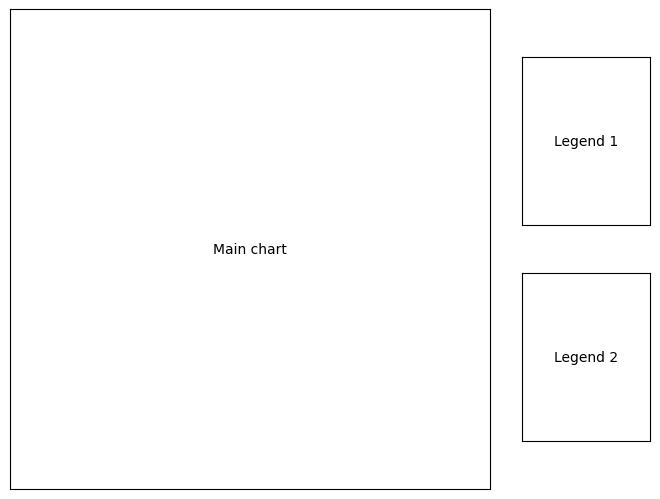

In [158]:
#Create an empty figure
fig = plt.figure()

#Add three sub-plots
ax0 = fig.add_axes(rect=[0.0, 0.0, 0.75, 1.0])
ax1 = fig.add_axes(rect=[0.8, 0.55, 0.2, 0.35])
ax2 = fig.add_axes(rect=[0.8, 0.10, 0.2, 0.35])

#Add text to each sub-plot to identify which is which
ax0.text(s=f'Main chart', x=0.5, y=0.5, ha='center', va='center')
ax1.text(s=f'Legend 1', x=0.5, y=0.5, ha='center', va='center')
ax2.text(s=f'Legend 2', x=0.5, y=0.5, ha='center', va='center')

#Remove the ticks
for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_xticks([])
    ax.set_yticks([])

### Show the hexagon grid (optional)

Generate a plot of the hexagon grid using [`geopandas.GeoDataFrame.plot`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html). Add state abbreviations at the centroids through [`matplotlib.axes.Axes.text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html). 

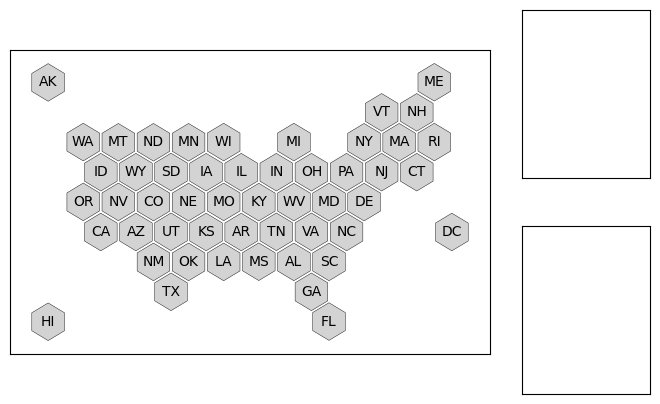

In [159]:
for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.clear()

#Plot the hexagons
df_merged.plot(ax=ax0, color='lightgrey', edgecolor='black', linewidth=0.3)

#Display state abbreviations
for _, row in df_merged.iterrows():
    ax0.text(x=row['centroids'].x, y=row['centroids'].y, s=row['State_Abbr'], ha='center', va='center')

#Remove the ticks
for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_xticks([])
    ax.set_yticks([])

display(fig)

### Generate the hexgrid map

Choose one _sequential_ colourmap in the shades of blue for Harris (Democrats) and one in the shades of red for Trump (Republicans). Note that, when combined, the two colormpas create a _divergent_ one.

In [160]:
cmaps = {'HARRIS': 'Blues', 'TRUMP': 'Reds'}

Generate the hexgrid map again using [`geopandas.GeoDataFrame.plot`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html). Note that parameter `column` defines the magnitude (measure) we want to represent and `cmap` the corresponding colour encoding.

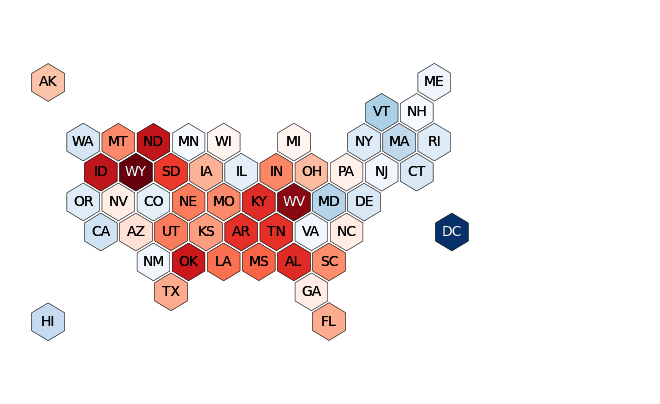

In [161]:
#Remove the previous plot
ax1.clear()

#Generate a choroplet map for the states where either Harris or Trump won
for candidate in (candidates := ['HARRIS', 'TRUMP']):
    df_merged[df_merged['WINNER'] == candidate].plot(ax=ax0, column='PERC_WINNER', edgecolor='black', cmap=cmaps[candidate], linewidth=0.3)

#Set thresholds for showing the state abbreviations black or white to maintain contrast
#black if < threshold, white otherwise
thresholds = dict()
for candidate in candidates:
    thresholds.update({candidate: df_merged[df_merged['WINNER'] == candidate]['PERC_WINNER'].quantile(q=0.95)})

#Add state abbreviations
for _, row in df_merged.iterrows():

    #Set text colour depending on the percentage of votes of the winner
    text_colour = 'black'
    if row['PERC_WINNER'] > thresholds[row['WINNER']]:
        text_colour = 'white'

    #Add state abbreviation at the centroid
    ax0.text(x=row['centroids'].x, y=row['centroids'].y, s=row['State_Abbr'], color=text_colour, ha='center', va='center')

#Suppress all axis decorations
for ax in [ax0, ax1, ax2]:
    ax.set_axis_off()

display(fig)

## Add the legends

Let's add the legends to display the colour-to-magnitude mapping fro each candidate. We do this in two steps: first we manually generate the entries (rectangular patches and labels) that will appear in each legend, then create the legends. There will be one entry for each of the levels (percentage of percentage of popular vote) defined in the `levels` variable.

### Create the legends' entries

Manually generate the patches ([`matplotlib.artist.Artist`](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)) and labels (`str`) that will populate the legends. Store them in the `labels` and `patches` containers respectively.

In [162]:
#Define the levels that will appear in the legend  
levels = [55, 60, 65, 70, 75]
levels.reverse() #Swap the list to make the highest level appear at the top of the legend.

labels, patches = dict(), dict()

for candidate in candidates:

    df_candidate = df_merged[df_merged['WINNER'] == candidate]
    
    #Get the min and max GDP value for min-max normalisation (see below)
    bounds = (df_candidate['PERC_WINNER'].min(), df_candidate['PERC_WINNER'].max())

    #Load the colormap
    cmap = mpl.colormaps[cmaps[candidate]]

    labels[candidate], patches[candidate] = list(), list()

    for level in levels:

        #Apply min-max normalisation to retrieve the corresponding colour from the colormap
        norm_value = (level - bounds[0])/(bounds[1] - bounds[0])

        #Extract the corresponding colour from the colormap
        colour = cmap(norm_value)

        #Create a rectangular patch with the given colour
        patches[candidate].append(Patch(edgecolor='lightgrey', facecolor=colour, linewidth=0.3))

        #Create the corresponding label
        labels[candidate].append(f'{level} %')

### Create the legends

Let the legends' titles display the candidate's name and the total electoral votes.

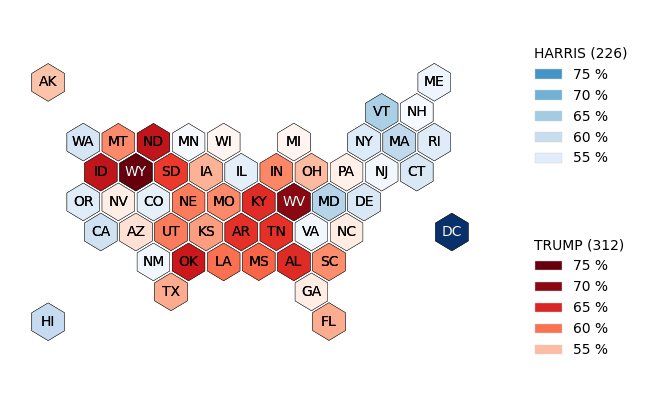

In [163]:
#Get the electoral votes for each candidate
el_votes_harris = df_merged[df_merged['WINNER'] == 'HARRIS']['ELECTORAL VOTES'].sum()
el_votes_trump = df_merged[df_merged['WINNER'] == 'TRUMP']['ELECTORAL VOTES'].sum()
    
leg1 = ax1.legend(handles=patches['HARRIS'], labels=labels['HARRIS'], loc='lower left', bbox_to_anchor=(0.0,0.0), title=f'HARRIS ({el_votes_harris})', frameon=False)
leg2 = ax2.legend(handles=patches['TRUMP'], labels=labels['HARRIS'], loc='upper left', bbox_to_anchor=(0.0,1.0), title=f'TRUMP ({el_votes_trump})', frameon=False)

for leg in [leg1, leg2]:
    leg._legend_box.align = "left"

display(fig)

### Add title and subtitle

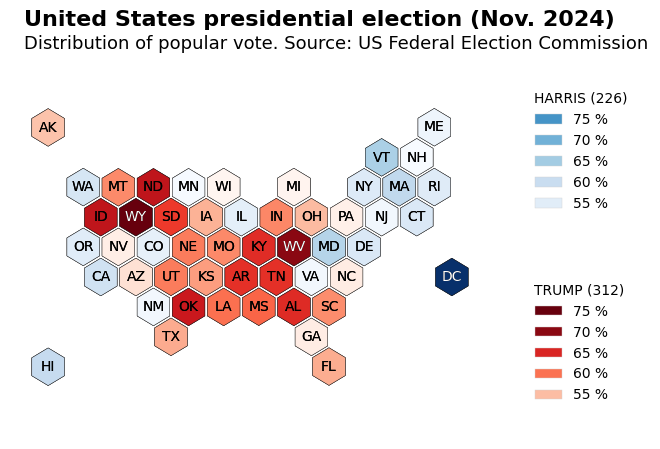

In [164]:
title = f'United States presidential election (Nov. 2024)'
subtitle = f'Distribution of popular vote. Source: US Federal Election Commission'
set_title_and_subtitle(fig=fig, title=title, subtitle=subtitle, alignment='left', h_offset=10)
display(fig)